In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.shape)

(768, 9)


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df['Pregnancies'].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


## EDA - Exploratory Data Analysis
For graphs and charts

In [9]:
import seaborn as sns

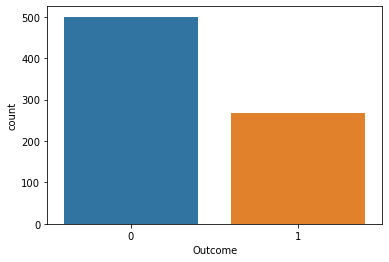

In [10]:
## let's drwa some charts and graph to analyze data
sns.countplot(x = df['Outcome']) #- countplot for plotting the counts of all the values in the column
plt.show()

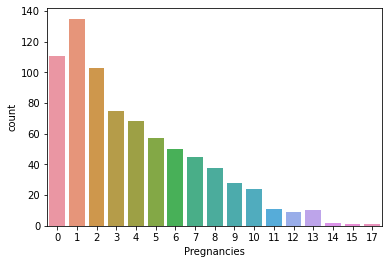

In [11]:
sns.countplot(x = df['Pregnancies'])
plt.show()

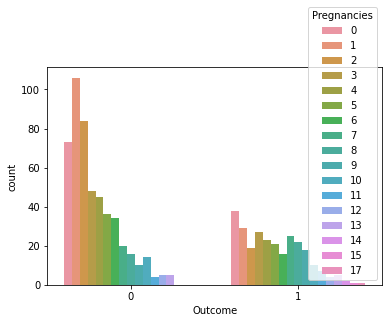

In [12]:
sns.countplot(x = df['Outcome'],hue = df['Pregnancies']) ## hue means different colour for all
# different pregnanicies values on different values of outcome
plt.show()

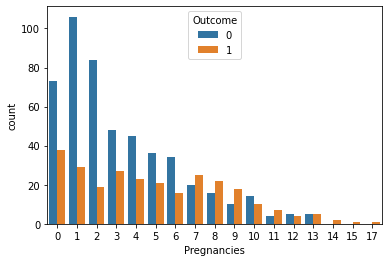

In [13]:
sns.countplot(x = df['Pregnancies'],hue = df['Outcome']) #hue means differnet colour for all different
# values of count on differnet values of pregnancies
plt.show()

In [14]:
df.groupby(['Pregnancies','Outcome'])['Outcome'].value_counts() #- means groupng pregnancies with
#outcome

Pregnancies  Outcome  Outcome
0            0        0           73
             1        1           38
1            0        0          106
             1        1           29
2            0        0           84
             1        1           19
3            0        0           48
             1        1           27
4            0        0           45
             1        1           23
5            0        0           36
             1        1           21
6            0        0           34
             1        1           16
7            0        0           20
             1        1           25
8            0        0           16
             1        1           22
9            0        0           10
             1        1           18
10           0        0           14
             1        1           10
11           0        0            4
             1        1            7
12           0        0            5
             1        1            4
13      

In [15]:
## outliers - An outlier is an observation that lies an abnormal distance from other values in a 
#random sample
## checking outliers for all columns
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


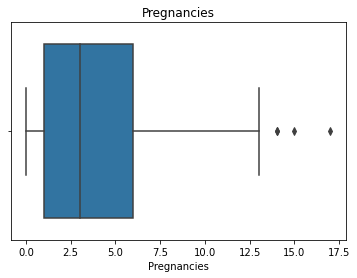

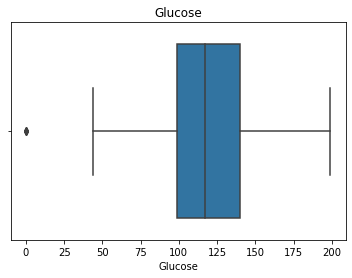

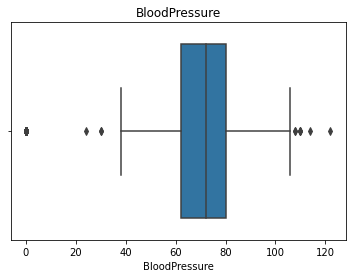

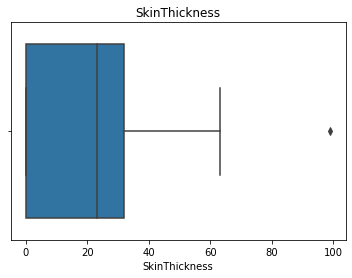

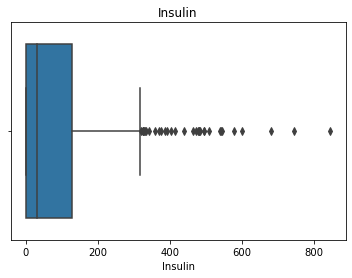

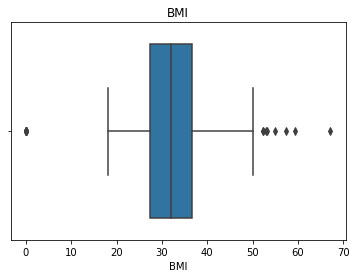

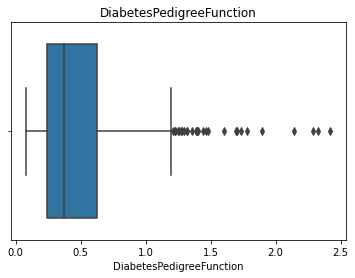

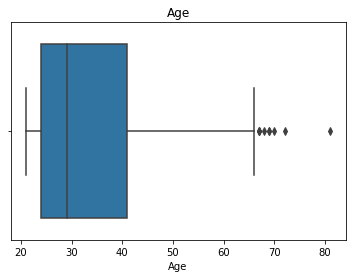

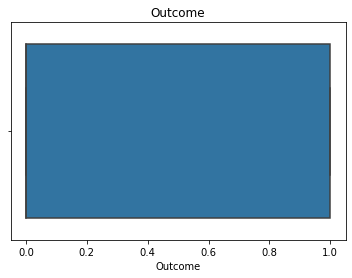

In [16]:
for i in df.columns :
    sns.boxplot(x = df[i])
    plt.title(i)
    plt.show()

## Now how to deal with these outliers

In [17]:
## diabetespedigree function and insulin have sufficient amout of outliers and other columns have few
## outliers so we will not handle ouliers for these columns because they are small in amount.
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [35]:
df[['DiabetesPedigreeFunction','Insulin']].describe(percentiles = [0.03,0.97]) #-The describe() method is used for 
#calculating some statistical data like percentile, mean and std of the numerical values of the Series
#or DataFrame

,DiabetesPedigreeFunction,Insulin
count,768.000000,768.000000
mean,0.460899,75.447396
std,0.290891,98.588953
min,0.078000,0.000000
3%,0.127010,0.000000
50%,0.372500,30.500000
97%,1.257861,369.801000
max,1.257930,369.900000


In [37]:
## 97 % data is smaller than 1.25 for diabetespedigreefunction and 97 % data is smaller than 369.9
## for insulin
print(len(df[df['DiabetesPedigreeFunction'] > 1.257861]))
print(len(df[df['Insulin'] > 369.801000]))

24
24


In [38]:
## so now these 24 are outliers
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']>1.257861,1.257861,df['DiabetesPedigreeFunction'] )
## where() function  Parameters: condition : When True, yield x, otherwise yield y. x,
df['Insulin'] = np.where(df['Insulin'] > 369.801000,369.801000,df['Insulin'])

In [39]:
print(len(df[df['DiabetesPedigreeFunction'] > 1.257930]))
print(len(df[df['Insulin'] > 369.900000]))

0
0


In [34]:
df[['DiabetesPedigreeFunction','Insulin']].describe(percentiles = [0.03,0.97])

,DiabetesPedigreeFunction,Insulin
count,768.000000,768.000000
mean,0.460899,75.447396
std,0.290891,98.588953
min,0.078000,0.000000
3%,0.127010,0.000000
50%,0.372500,30.500000
97%,1.257861,369.801000
max,1.257930,369.900000


In [40]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(768, 8)
(768,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
def gen_class_met(y_test,ypred_m) :
    cm = confusion_matrix(y_test,ypred_m)
    print(cm)
    print(classification_report(y_test,ypred_m))
def model_score(m) :
    print("Training Score :",m.score(x_train,y_train))
    print("Testing Score :",m.score(x_test,y_test))

In [62]:
m1 = LogisticRegression(max_iter = 200)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [63]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 0]


In [64]:
model_score(m1)
print("Accuracy : ",accuracy_score(y_test,ypred_m1))

Training Score : 0.7847222222222222
Testing Score : 0.7864583333333334
Accuracy :  0.7864583333333334


In [65]:
gen_class_met(y_test,ypred_m1)

[[115   8]
 [ 33  36]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       123
           1       0.82      0.52      0.64        69

    accuracy                           0.79       192
   macro avg       0.80      0.73      0.74       192
weighted avg       0.79      0.79      0.77       192



In [106]:
m2 = KNeighborsClassifier(n_neighbors = 17)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [107]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 1]


In [108]:
model_score(m2)
print("Accuracy : ",accuracy_score(y_test,ypred_m2))

Training Score : 0.7864583333333334
Testing Score : 0.765625
Accuracy :  0.765625


In [109]:
gen_class_met(y_test,ypred_m2)

[[113  10]
 [ 35  34]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       123
           1       0.77      0.49      0.60        69

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.72       192
weighted avg       0.77      0.77      0.75       192



In [121]:
m3 = SVC(kernel = 'linear',C = 1)
m3.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [122]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 0]


In [123]:
model_score(m3)
print("Accuracy : ",accuracy_score(y_test,ypred_m3))

Training Score : 0.7795138888888888
Testing Score : 0.78125
Accuracy :  0.78125


In [124]:
gen_class_met(y_test,ypred_m3)

[[113  10]
 [ 32  37]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       123
           1       0.79      0.54      0.64        69

    accuracy                           0.78       192
   macro avg       0.78      0.73      0.74       192
weighted avg       0.78      0.78      0.77       192



In [126]:
m4 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,min_samples_split = 30)
m4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=30)

In [127]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1]


In [128]:
model_score(m4)
print("Accuracy : ",accuracy_score(y_test,ypred_m4))

Training Score : 0.7934027777777778
Testing Score : 0.7604166666666666
Accuracy :  0.7604166666666666


In [129]:
gen_class_met(y_test,ypred_m4)

[[106  17]
 [ 29  40]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       123
           1       0.70      0.58      0.63        69

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192



In [130]:
m5 = RandomForestClassifier(criterion= 'entropy',max_depth = 5,min_samples_split = 25,n_estimators=60)
m5.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=25,
                       n_estimators=60)

In [132]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

[0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1]


In [133]:
model_score(m5)
print("Accuracy : ",accuracy_score(y_test,ypred_m5))

Training Score : 0.8229166666666666
Testing Score : 0.7760416666666666
Accuracy :  0.7760416666666666


In [134]:
gen_class_met(y_test,ypred_m5)

[[115   8]
 [ 35  34]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       123
           1       0.81      0.49      0.61        69

    accuracy                           0.78       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.78      0.78      0.76       192

